In [ ]:
#this exercise is based in youtube tutorial by SiddHardhan
#link: https://youtu.be/L3OtLaCbJC8
#dataset: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv
    

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
#load the dataset from csv
car_dataset = pd.read_csv('car data.csv')
car_dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#count rows & columns , (301 rows & 9 columns)
car_dataset.shape
car_dataset.info()
#df = pd.DataFrame(car_dataset)
#df.isna().sum()
car_dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
#encoding data from categorical to numerical
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)
car_dataset.head(20)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


In [ ]:
#split test & training data
#axis = 1 for column , axis = 0 for row
X = car_dataset.drop(['Car_Name','Selling_Price'], axis = 1)
Y = car_dataset['Selling_Price']
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
#split training & test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

In [ ]:
#calling model training
lin_reg_model = LinearRegression()


In [ ]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#model evaluation
#prediction on training data

training_data_prediction = lin_reg_model.predict(X_train)


In [ ]:
#r squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("r squared error: ", error_score)

r squared error:  0.879945166049371


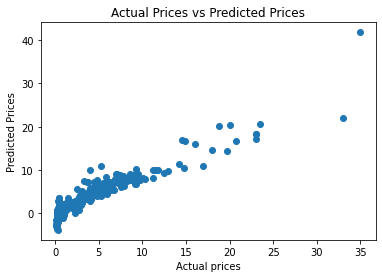

In [ ]:
#visualize actual prices and predicted prices

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
#test prediction
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
#r squared error test
error_score_test = metrics.r2_score(Y_test, test_data_prediction)
print("r squared error: ", error_score_test)

r squared error:  0.8365766715027515


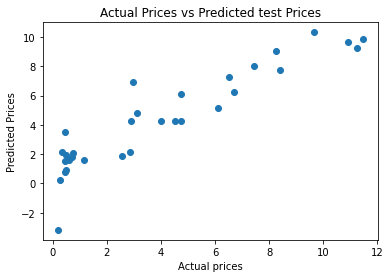

In [ ]:
#visualize actual prices and test predicted prices

plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted test Prices")
plt.show()

In [ ]:
#lasso regression



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=050c424d-4808-417f-bf01-ddcec3324e7b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>